In [29]:
import numpy as np
from sklearn.datasets import make_blobs, make_regression
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import utils as ut
import pandas as pd
from keras.optimizers import SGD
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import random

In [30]:
tf.random.set_seed(42)
np.random.seed(42)
random.seed(10)

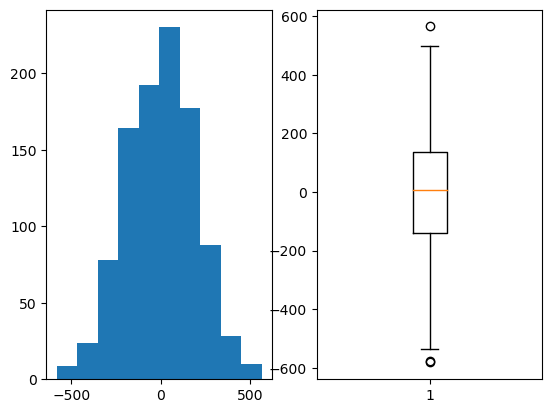

In [31]:
X,y = make_regression(n_samples=1000, n_features=20, noise=0.1)
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
plt.subplot(121)
plt.hist(y)

plt.subplot(122)
_ = plt.boxplot(y)


## Simple regression model to demonstrate exploding gradients problem 

nan nan


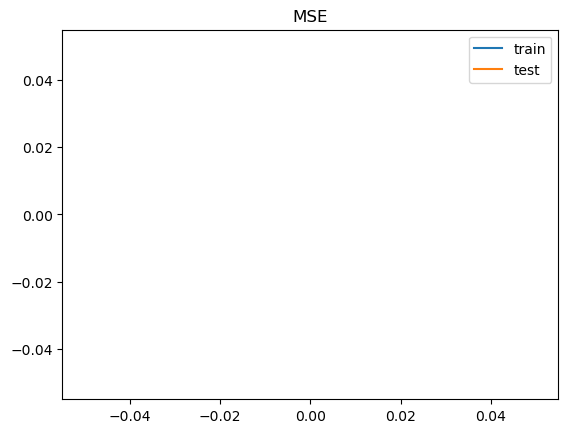

In [32]:
model = tf.keras.Sequential()
model.add(layers.Dense(20, activation='relu', name='layer-0', kernel_initializer='he_uniform'))
model.add(layers.Dense(1, activation='linear', name='layer-1'))

opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='mse')

history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)

plt.title('MSE')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

print(train_mse, test_mse)

## Clipnorm
- clipping the value of norm

1.2566807270050049 28.0327091217041


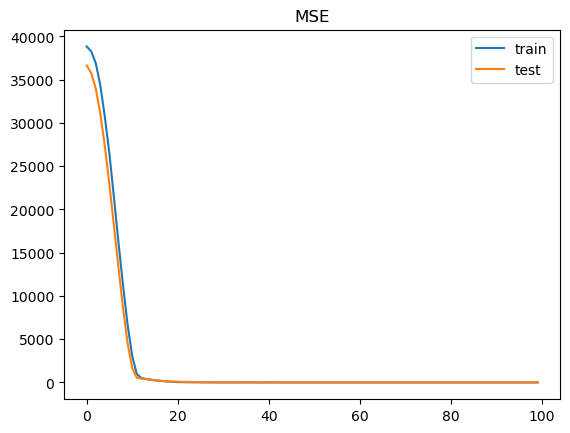

In [33]:
model = tf.keras.Sequential()
model.add(layers.Dense(20, activation='relu', name='layer-0', kernel_initializer='he_uniform'))
model.add(layers.Dense(1, activation='linear', name='layer-1'))

opt = SGD(learning_rate=0.01, momentum=0.9, clipnorm=1.0)
model.compile(optimizer=opt, loss='mse')

history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)

plt.title('MSE')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

print(train_mse, test_mse)

### Clipvalue
- clipping the value of gradient

20.688709259033203 26.97075653076172


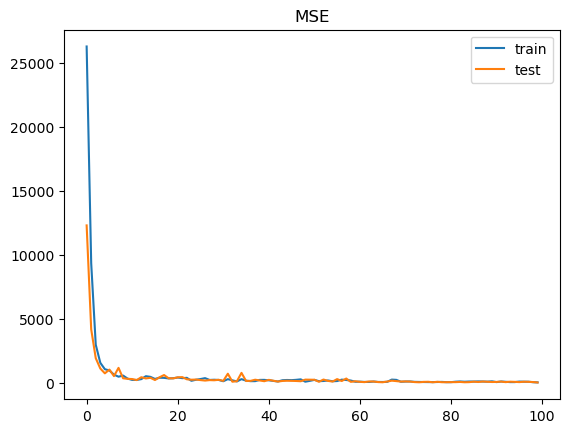

In [34]:
model = tf.keras.Sequential()
model.add(layers.Dense(20, activation='relu', name='layer-0', kernel_initializer='he_uniform'))
model.add(layers.Dense(1, activation='linear', name='layer-1'))

opt = SGD(learning_rate=0.01, momentum=0.9, clipvalue=5.0)
model.compile(optimizer=opt, loss='mse')

history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)

plt.title('MSE')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

print(train_mse, test_mse)

Observations:
- For the same data, pre-processing the data gives better result than clipping or normalizing it 